## scikit-learnライブラリ
`scikit-learn`ライブラリには分類、回帰、クラスタリング、次元削減、前処理、モデル選択などの機械学習の処理を行うためのモジュールが含まれています。以下では、`scikit-learn`ライブラリの`KMeans`クラスを使ったk-means法によるクラスタリングについて説明します。

機械学習では、観察されたデータをよく表すようにモデルのパラメータの調整を行います。パラメータを調整することでモデルをデータに適合させるので、「学習」と呼ばれます。特に、観測されたデータの特徴のみからそのデータセットの構造やパターンをよく表すようなモデルを学習することを**教師なし学習**と呼びます。クラスタリングは教師なし学習の例です。クラスタリングでは、観測されたデータをクラスタと呼ばれる集合にグループ分けします。

`scikit-learn`ライブラリには機械学習に用いる代表的なデータセットが含まれています。以下では、`load_iris`関数により`iris`データセットをロードしています。`iris`データセットにはアヤメの花を4つの特徴量（'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'）で表した150個の特徴量ベクトルが含まれています（`iris['data']`)。また、各花には3種類（0:'setosa', 1:'versicolor', 2:'virginica'）のいずれかがラベルとして付与されています（`iris['target']`)


`iris['data']`行列の各行は1つの花の特徴量ベクトルに対応しており、行数はデータの総数（この場合は150）を表します。1列目から4列目までの各列は上記の特徴量に対応しています。`scikit-learn`では、この特徴量ベクトルからなる行列を`NumPy`配列または`pandas`のデータフレームに格納し、入力データとして処理します。

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris() # データセットのロード
print(len(iris['data'])) # データの総数
print(iris['feature_names']) # 特徴量名
print(iris['data'][0:5]) # データ（先頭5行を表示）
print(iris['target_names']) # ラベル名
print(iris['target'][0:5], iris['target'][50:55], iris['target'][100:105]) # ラベル

150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0] [1 1 1 1 1] [2 2 2 2 2]


`iris['data']`の3列目と4列目の2つの特徴量（'petal length (cm)', 'petal width (cm)'）を用いて散布図でデータを可視化してみます。

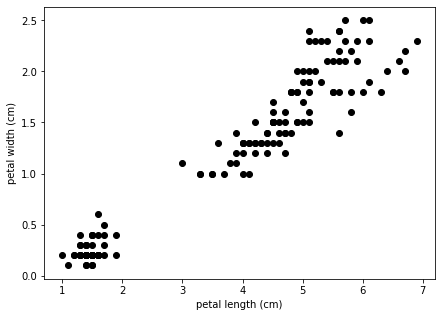

In [ ]:
X_iris=iris['data'][:,2:4]
plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])
plt.scatter(X_iris[:,0],X_iris[:,1],c='black');

アヤメの種類（0:'setosa', 1:'versicolor', 2:'virginica'）ごとに色を変えて同様にデータを可視化してみると、種類ごとにグループになっており、アヤメの種類ごとに似た特徴量を持っていることがわかります。以下では、クラスタリングによりこれらのグループをクラスタとして自動的に抽出することを考えます。

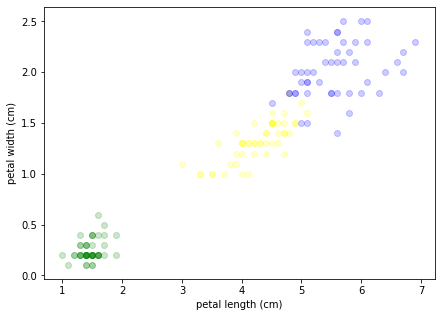

In [ ]:
labels=iris['target']
plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])
plt.scatter(X_iris[labels==0,0],X_iris[labels==0,1],c='green', alpha=0.2)
plt.scatter(X_iris[labels==1,0],X_iris[labels==1,1],c='yellow', alpha=0.2)
plt.scatter(X_iris[labels==2,0],X_iris[labels==2,1],c='blue', alpha=0.2);

`scikit-learn`では、以下の手順でデータからモデルの学習を行います。
- 使用するモデルのクラスの選択
- モデルのハイパーパラメータの選択とインスタンス化
- データの準備
    - 教師なし学習では、特徴量データを準備
- モデルをデータに適合（`fit()`メソッド）
- モデルの評価
    - 教師なし学習では、`transform()`または`predict()`メソッドを用いて特徴量データのクラスタリングや次元削減などを行う

以下では、`iris`データセットの2つの特徴量（'petal length (cm)', 'petal width (cm)'）を元にアヤメのデータをk-means法によりクラスタリングする手続きを示しています。

モデルのクラスとして`KMeans`を選択し、モデルのハイパーパラメータの選択とインスタンス化では、引数`n_clusters`にハイパーパラメータとしてクラスタ数、ここでは3、を指定して`KMeans`クラスのインスタンスを作成しています。そして、`fit()`メソッドによりモデルを入力データ`X_iris`に適合させ、`predict()`メソッドを用いて各データが所属するクラスタ（0,1,2で表現）の情報をリストとして取得しています。最後に、クラスタリングの結果を元に、クラスタごとに異なる色でデータを可視化しています。

[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

31.371358974358973


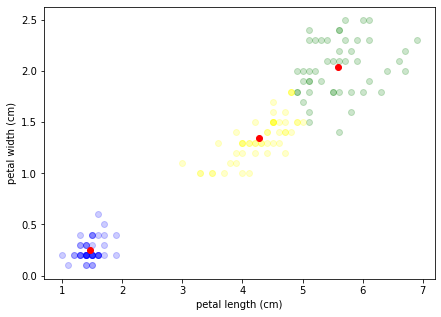

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0) 
model.fit(X_iris) 
clusters=model.predict(X_iris) 

plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])

plt.scatter(X_iris[clusters==0,0],X_iris[clusters==0,1],c='blue', alpha=0.2)
plt.scatter(X_iris[clusters==1,0],X_iris[clusters==1,1],c='green', alpha=0.2)
plt.scatter(X_iris[clusters==2,0],X_iris[clusters==2,1],c='yellow', alpha=0.2)

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red'); # クラスタの中心点
print(model.inertia_) # コスト関数の値